In [3]:

import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv(r"D:\ml_codes_backup\ml cades\ml datasets\decision tree\titanic.csv")


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)


In [8]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [9]:
x=df.drop(['Survived'],axis=1)


In [10]:
y=df.Survived


In [12]:
#Checking for missing values

In [13]:
df.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [14]:
len(df.Age)


891

In [17]:
#Replacing the missing values in the age column with the mean

In [18]:
mean=df.Age.mean()

In [19]:
mean

29.69911764705882

In [20]:
import math


In [21]:
mean=math.floor(mean)


In [22]:
mean

29

In [23]:
df.Age=df.Age.fillna(mean)

In [24]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,29.0,23.4500
889,1,1,male,26.0,30.0000


In [25]:
from sklearn.preprocessing import LabelEncoder


In [26]:
le=LabelEncoder()

In [27]:
df.Sex=le.fit_transform(df.Sex)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001523102DBE0>,
      dtype=object)

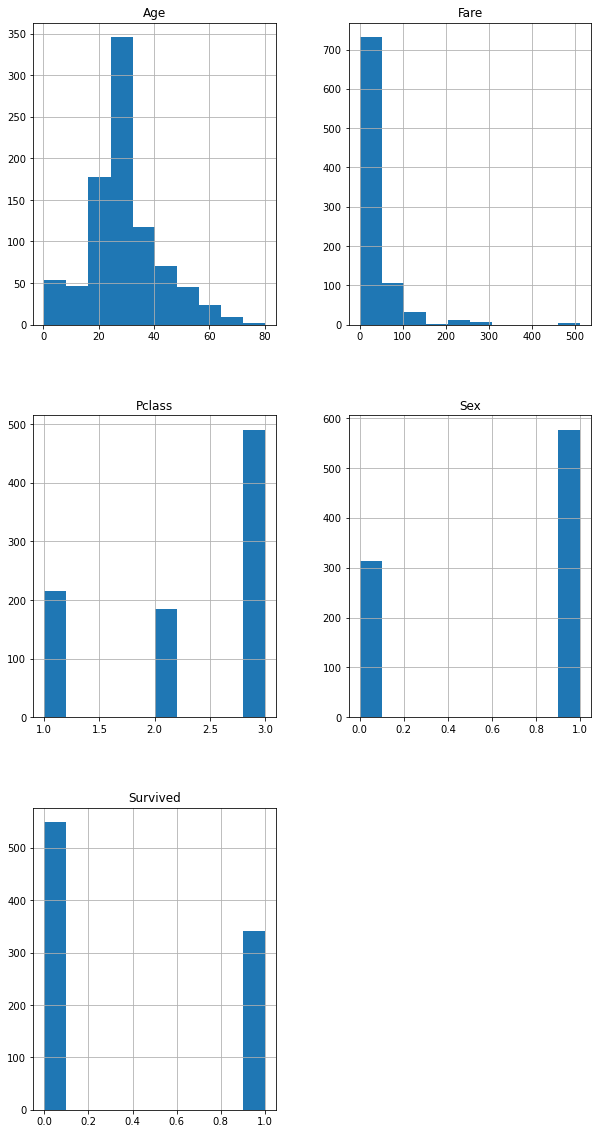

In [384]:
df.hist(figsize=(10,20))

In [29]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

In [30]:
df.corr()

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338481,-0.543351,-0.067814,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.334974,-0.549500
Sex,-0.543351,0.131900,1.000000,0.082949,-0.182333
Age,-0.067814,-0.334974,0.082949,1.000000,0.093706
Fare,0.257307,-0.549500,-0.182333,0.093706,1.000000


In [31]:
x=df.drop(['Survived'],axis=1)

In [32]:
y=df.Survived

In [33]:
from sklearn.model_selection import train_test_split

In [369]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.10)


In [370]:
from sklearn import tree


In [371]:
model=tree.DecisionTreeClassifier(criterion='gini', max_depth=8,random_state=150)


In [372]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=170)

In [376]:
final_model=model.score(X_test,y_test)

In [377]:
final_model

0.9